# Data Distribution: Explore more diverse data distribution using different parameter sets
- Bimodal: small sigma_u and sigma_b rates, rho/d ~10, d =1
- Poisson: increase sigma_u and sigma_b rates, rho/d ~10, rho --> 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tqdm
from sympy import sqrt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Import all the functions from the 'src' directory, we import all the functions from each module so we can use them straight away
from ssa_simulation import *
from ssa_analysis import *
from ssa_classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Simulating Telegraph Model Systems:   0%|          | 0/2 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_u': 0.1, 'sigma_b': 0.1, 'rho': 20.0, 'd': 1.0, 'label': 0}


Simulating Telegraph Model Systems:  50%|█████     | 1/2 [00:07<00:07,  7.40s/it]

Running simulations on 12 cores...
System 2 parameters: {'sigma_u': 0.05, 'sigma_b': 0.2, 'rho': 12.5, 'd': 1.0, 'label': 1}


Simulating Telegraph Model Systems: 100%|██████████| 2/2 [00:14<00:00,  7.33s/it]
/home/ianyang/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Statistical Report ===

📊 **Steady-State Statistics:**
  Stressed Condition (after 10.0 min):
    - Mean mRNA Count: 9.74
    - Variance: 93.49

  Normal Condition (after 10.0 min):
    - Mean mRNA Count: 9.87
    - Variance: 31.26
=== SVM Classification Accuracy: 1.00 ===
=== Random Forest Accuracy: 0.96 ===
=== Logistic Regression Accuracy: 0.59 ===
=== Random Classifier Accuracy: 0.42 ===


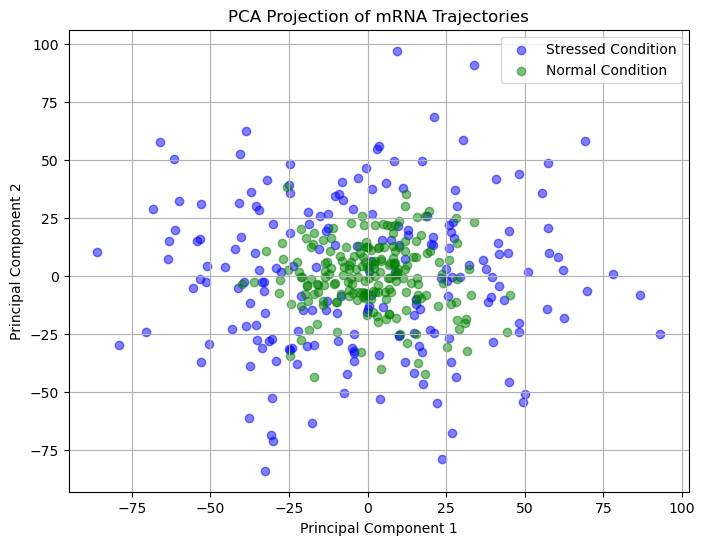

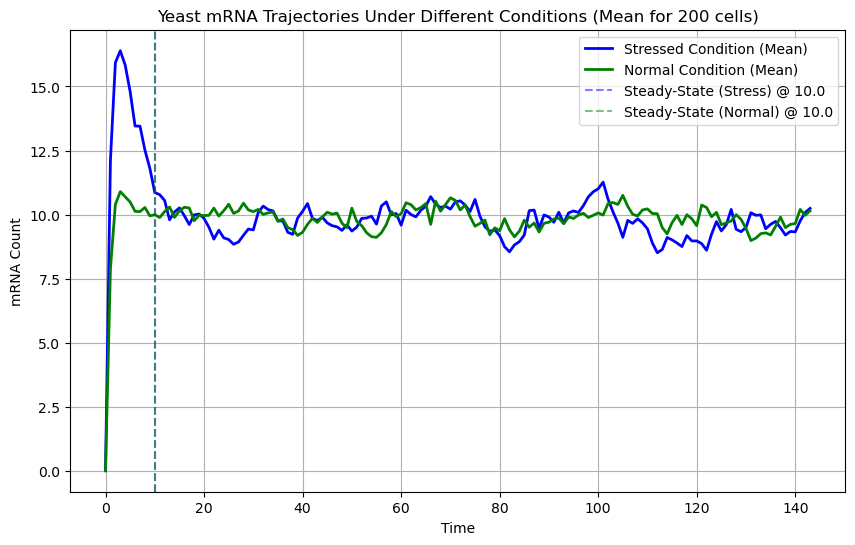

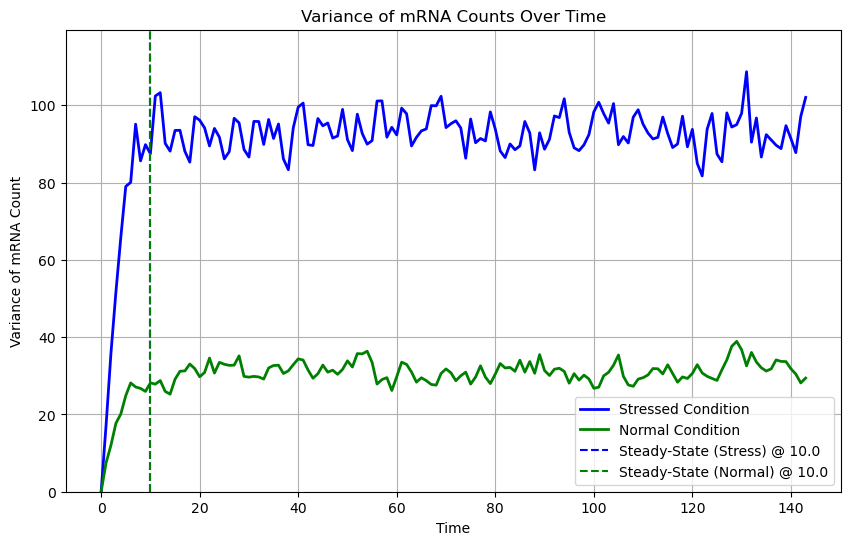


=== Variance at Steady State ===
  Stressed Condition (after 10.0 min): Mean = 9.74, Variance = 93.49
  Normal Condition (after 10.0 min): Mean = 9.87, Variance = 31.26


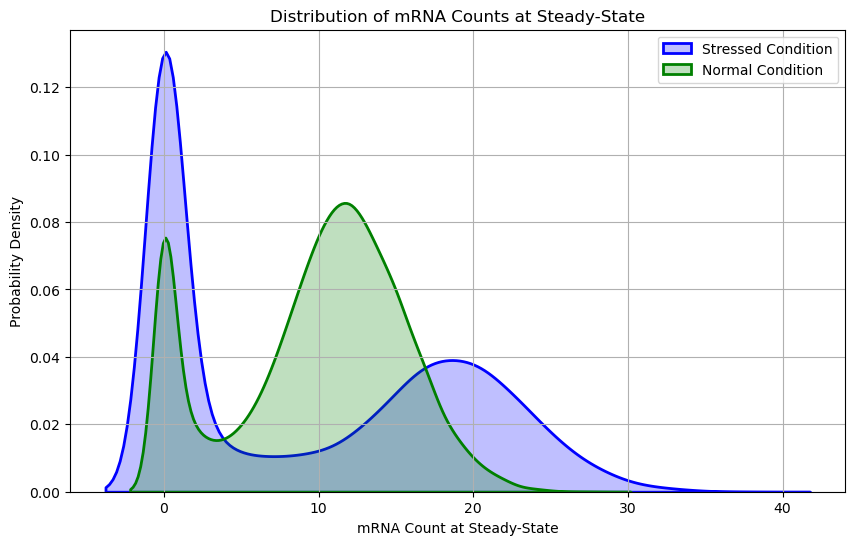

In [3]:
####### BIMODAL DISTRIBUTION + MEANM FIXING #######
# Define system parameters
mu_target = 10.0  

# Define activation/deactivation rates for two conditions
sigma_u_stress, sigma_b_stress = 0.1, 0.1  # Stressed Condition
sigma_u_normal, sigma_b_normal = 0.05, 0.2   # Normal Condition

# Define degradation rates
d_stress = d_normal = 1.0

# Compute corresponding transcription rates (rho) using the given formula
rho_stress = (mu_target * d_stress * (sigma_u_stress + sigma_b_stress)) / sigma_b_stress
rho_normal = (mu_target * d_normal * (sigma_u_normal + sigma_b_normal)) / sigma_b_normal

# Updated parameter sets ensuring similar mean mRNA levels
parameter_sets = [
    {"sigma_u": sigma_u_stress, "sigma_b": sigma_b_stress, "rho": rho_stress, "d": d_stress, "label": 0},
    {"sigma_u": sigma_u_normal, "sigma_b": sigma_b_normal, "rho": rho_normal, "d": d_normal, "label": 1},
]

# Set up simulation parameters 
# !! Use np.arange to make sure evenly spaced values within a given interval, to match how exp data is collected at set time intervals !!
time_points = np.arange(0, 144.0, 1.0)  # Time range: start, stop, step; 
# 144 time points: to match experimental conditions, where typically a photo is taken every 5 min over 12 hours --> 144 time points

size = 200  # Reduce number of simulations per condition for efficiency

# Run the simulation function
df_results = simulate_two_telegraph_model_systems(parameter_sets, time_points, size)

# Save dataset for ML classification
output_file = "data/mRNA_traj_mean_fixed_bimodal.csv"
df_results.to_csv(output_file, index=False)

# Extract mRNA trajectories for each condition
stress_trajectories = df_results[df_results['label'] == 0].iloc[:, 1:].values  # Stressed Condition
normal_trajectories = df_results[df_results['label'] == 1].iloc[:, 1:].values  # Normal condition

# report the mean and variance of the mRNA counts at steady state
report = statistical_report(parameter_sets, stress_trajectories, normal_trajectories)
X_train, X_test, y_train, y_test = load_and_split_data(output_file)
svm_accuracy = svm_classifier(X_train, X_test, y_train, y_test)
rf_accuracy = random_forest_classifier(X_train, X_test, y_train, y_test)
log_reg_accuracy = logistic_regression_classifier(X_train, X_test, y_train, y_test)
random_accuracy = random_classifier(y_test)
pca_plot(output_file)

# Plots
plot_mRNA_trajectory(parameter_sets, time_points, stress_trajectories, normal_trajectories)
plot_mRNA_variance(parameter_sets, time_points, stress_trajectories, normal_trajectories)
plot_mRNA_dist(parameter_sets, stress_trajectories, normal_trajectories)

In [ ]:
####### POISSON DISTRIBUTION + MEAN FIXING #######
# Define system parameters
mu_target = 10.0  

# Define activation/deactivation rates for two conditions
sigma_u_stress, sigma_b_stress = 0.1, 0.1  # Stressed Condition
sigma_u_normal, sigma_b_normal = 0.05, 0.2   # Normal Condition

# Define degradation rates
d_stress = d_normal = 1.0

# Compute corresponding transcription rates (rho) using the given formula
rho_stress = (mu_target * d_stress * (sigma_u_stress + sigma_b_stress)) / sigma_b_stress
rho_normal = (mu_target * d_normal * (sigma_u_normal + sigma_b_normal)) / sigma_b_normal

# Updated parameter sets ensuring similar mean mRNA levels
parameter_sets = [
    {"sigma_u": sigma_u_stress, "sigma_b": sigma_b_stress, "rho": rho_stress, "d": d_stress, "label": 0},
    {"sigma_u": sigma_u_normal, "sigma_b": sigma_b_normal, "rho": rho_normal, "d": d_normal, "label": 1},
]

# Set up simulation parameters 
# !! Use np.arange to make sure evenly spaced values within a given interval, to match how exp data is collected at set time intervals !!
time_points = np.arange(0, 144.0, 1.0)  # Time range: start, stop, step; 
# 144 time points: to match experimental conditions, where typically a photo is taken every 5 min over 12 hours --> 144 time points

size = 200  # Reduce number of simulations per condition for efficiency

# Run the simulation function
df_results = simulate_two_telegraph_model_systems(parameter_sets, time_points, size)

# Save dataset for ML classification
output_file = "data/mRNA_traj_mean_fixed_bimodal.csv"
df_results.to_csv(output_file, index=False)

# Extract mRNA trajectories for each condition
stress_trajectories = df_results[df_results['label'] == 0].iloc[:, 1:].values  # Stressed Condition
normal_trajectories = df_results[df_results['label'] == 1].iloc[:, 1:].values  # Normal condition

# report the mean and variance of the mRNA counts at steady state
report = statistical_report(parameter_sets, stress_trajectories, normal_trajectories)
X_train, X_test, y_train, y_test = load_and_split_data(output_file)
svm_accuracy = svm_classifier(X_train, X_test, y_train, y_test)
rf_accuracy = random_forest_classifier(X_train, X_test, y_train, y_test)
log_reg_accuracy = logistic_regression_classifier(X_train, X_test, y_train, y_test)
random_accuracy = random_classifier(y_test)
pca_plot(output_file)

# Plots
plot_mRNA_trajectory(parameter_sets, time_points, stress_trajectories, normal_trajectories)
plot_mRNA_variance(parameter_sets, time_points, stress_trajectories, normal_trajectories)
plot_mRNA_dist(parameter_sets, stress_trajectories, normal_trajectories)

In [ ]:
# Define parameters for two different data distributions
params_bimodal = {"sigma_u": 0.1, "sigma_b": 0.1, "rho": 10.0, "d": 1.0, "label": 0} # the label  here doens't mean anything
params_poisson = {"sigma_u": 1.0, "sigma_b": 1.0, "rho": 10.0, "d": 1.0, "label": 1} # the label  here doens't mean anything

# Set up simulation parameters
time_points = np.arange(0, 144.0, 1.0)  # Time range: start, stop, step
size = 200  # Size of the simulation

# Run the simulation function for both parameter sets
df_results_bimodal = simulate_one_telegraph_model_system(params_bimodal, time_points, size)
df_results_poisson = simulate_one_telegraph_model_system(params_poisson, time_points, size)

# Save datasets for ML classification
output_file_bimodal = "data/mRNA_traj_bimodal_dist.csv"
output_file_poisson = "data/mRNA_traj_poisson_dist.csv"
df_results_bimodal.to_csv(output_file_bimodal, index=False)
df_results_poisson.to_csv(output_file_poisson, index=False)


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_u': 0.1, 'sigma_b': 0.1, 'rho': 10.0, 'd': 1.0, 'label': 0}


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_u': 0.1, 'sigma_b': 0.1, 'rho': 10.0, 'd': 1.0, 'label': 0}


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_u': 1.0, 'sigma_b': 1.0, 'rho': 10.0, 'd': 1.0, 'label': 1}


Simulating Telegraph Model Systems: 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]


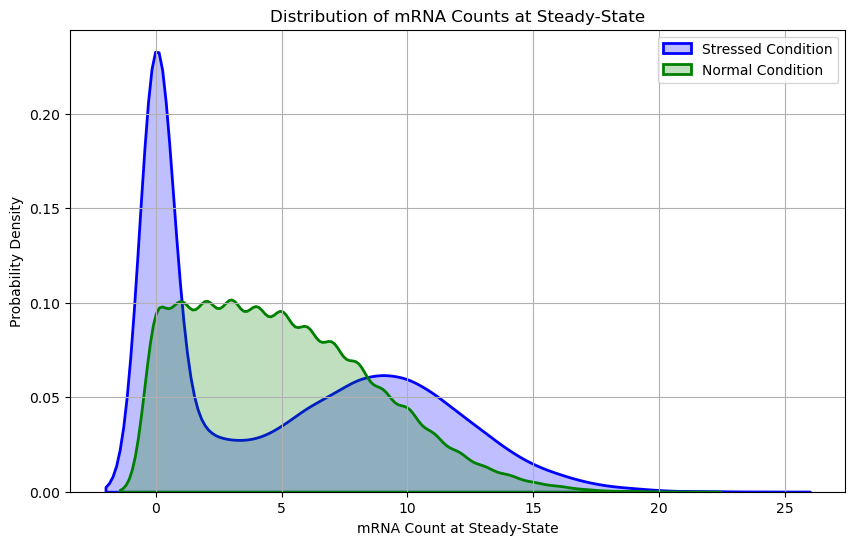

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
# Extract mRNA trajectories for each condition
bimodal_trajectories = df_results_bimodal[df_results_bimodal['label'] == 0].iloc[:, 1:].values  # Stressed Condition
poisson_trajectories = df_results_poisson[df_results_poisson['label'] == 1].iloc[:, 1:].values  # Normal condition
# plots
plot_mRNA_dist([params_bimodal, params_poisson], bimodal_trajectories, poisson_trajectories)
plot_mRNA_trajectory([params_bimodal, bimodal_trajectories], time_points, df_results_bimodal, df_results_poisson)

plot_mRNA_variance([params_bimodal, bimodal_trajectories], time_points, df_results_bimodal, df_results_poisson)

In [12]:
def calculate_parameters(avg, var, autocorr_time):
    """
    Calculate the parameters sigma_u, sigma_b, and rho based on the given average, variance, and autocorrelation time.
    
    Parameters:
    avg (float): The desired average.
    var (float): The desired variance.
    autocorr_time (float): The desired autocorrelation time.
    
    Returns:
    dict: A dictionary containing the calculated parameters.
    """
    # Example calculation (you may need to adjust this based on your specific model)
    sigma_u = var / avg
    sigma_b = var / (avg * autocorr_time)
    rho = avg * autocorr_time
    
    return {"sigma_u": sigma_u, "sigma_b": sigma_b, "rho": rho, "d": 1.0, "label": 0}

# Example usage
avg = 10.0
var = 5.0
autocorr_time = 2.0

params = calculate_parameters(avg, var, autocorr_time)
print(params)

# Now you can use these parameters to run the simulation
time_points = np.arange(0, 144.0, 1.0)  # Time range: start, stop, step
size = 200  # Size of the simulation

df_results = simulate_one_telegraph_model_system(params, time_points, size)
print(df_results)

{'sigma_u': 0.5, 'sigma_b': 0.25, 'rho': 20.0, 'd': 1.0, 'label': 0}


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_u': 0.5, 'sigma_b': 0.25, 'rho': 20.0, 'd': 1.0, 'label': 0}


Simulating Telegraph Model Systems: 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

     label  time_0.0  time_1.0  time_2.0  time_3.0  time_4.0  time_5.0  \
0        0         0        16         8         2         8        17   
1        0         0         9         4         1        11        13   
2        0         0        17        16         6         2         0   
3        0         0        10        20        30        26        17   
4        0         0        11        19        14        14        21   
..     ...       ...       ...       ...       ...       ...       ...   
195      0         0        16        15        14        15        17   
196      0         0         9        16        20        16         8   
197      0         0        22        26        24        11         2   
198      0         0         1         1         0         0         0   
199      0         0        14        24        16         4         1   

     time_6.0  time_7.0  time_8.0  ...  time_134.0  time_135.0  time_136.0  \
0          20        25        21

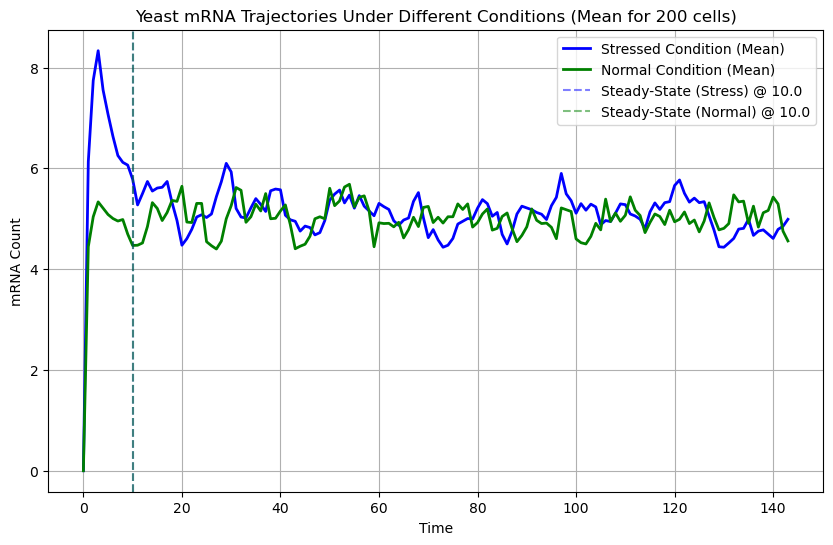